## Loading/Merging Dataset For Credit Card Fraud Detection

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wr
wr.filterwarnings(action="ignore")
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [7]:
# load data
account = pd.read_csv('/Users/ohenmaao/Desktop/SPRING 2024/Credit_fraud/Data/Customer Profiles/account_activity.csv')
anomaly = pd.read_csv('/Users/ohenmaao/Desktop/SPRING 2024/Credit_fraud/Data/Transaction Amounts/anomaly_scores.csv')
customer = pd.read_csv('/Users/ohenmaao/Desktop/SPRING 2024/Credit_fraud/Data/Customer Profiles/customer_data.csv')
fraud = pd.read_csv('/Users/ohenmaao/Desktop/SPRING 2024/Credit_fraud/Data/Fraudulent Patterns/fraud_indicators.csv')
suspicous = pd.read_csv('/Users/ohenmaao/Desktop/SPRING 2024/Credit_fraud/Data/Fraudulent Patterns/suspicious_activity.csv')
merchant = pd.read_csv('/Users/ohenmaao/Desktop/SPRING 2024/Credit_fraud/Data/Merchant Information/merchant_data.csv')
tran_cat = pd.read_csv('/Users/ohenmaao/Desktop/SPRING 2024/Credit_fraud/Data/Merchant Information/transaction_category_labels.csv')
amount =  pd.read_csv('/Users/ohenmaao/Desktop/SPRING 2024/Credit_fraud/Data/Transaction Amounts/amount_data.csv')
tran_data = pd.read_csv('/Users/ohenmaao/Desktop/SPRING 2024/Credit_fraud/Data/Transaction Data/transaction_metadata.csv')
tran_rec = pd.read_csv('/Users/ohenmaao/Desktop/SPRING 2024/Credit_fraud/Data/Transaction Data/transaction_records.csv')

In [8]:
# merge into single dataframe
cust_data = pd.merge(account, customer, on='CustomerID')
cust_data = pd.merge(cust_data, suspicous, on='CustomerID')

transaction_data1 = pd.merge(tran_data, tran_rec, on='TransactionID')
transaction_data2 = pd.merge(anomaly, amount, on='TransactionID')
transaction_data3 = pd.merge(fraud, tran_cat, on='TransactionID')
transaction_data = pd.merge(transaction_data1, transaction_data2, on='TransactionID')
transaction_data = pd.merge(transaction_data, transaction_data3, on='TransactionID')

data = pd.merge(cust_data, transaction_data, on='CustomerID')
print(data.head())

   CustomerID  AccountBalance   LastLogin           Name  Age       Address  \
0        1001     9507.272060  2022-01-01  Customer 1001   54  Address 1001   
1        1003     1715.321989  2022-01-03  Customer 1003   40  Address 1003   
2        1004     3101.509134  2022-01-04  Customer 1004   30  Address 1004   
3        1004     3101.509134  2022-01-04  Customer 1004   30  Address 1004   
4        1005     5405.766914  2022-01-05  Customer 1005   46  Address 1005   

   SuspiciousFlag  TransactionID            Timestamp  MerchantID     Amount  \
0               0            787  2022-02-02 18:00:00        2627  33.670626   
1               0            641  2022-01-27 16:00:00        2496  30.980239   
2               0            450  2022-01-19 17:00:00        2184  11.167088   
3               0            921  2022-02-08 08:00:00        2111  45.849784   
4               0            599  2022-01-25 22:00:00        2191  81.808651   

   AnomalyScore  TransactionAmount  FraudInd

## Descriptive Statistics 

In [9]:
# count of unique customers
print(len(data['CustomerID']))

1000


In [10]:
# mean, median, mode, standard deviation, minimum and maximun of account balance 
mean = data['AccountBalance'].mean()
median = data['AccountBalance'].median()
mode = data['AccountBalance'].mode()
std = data['AccountBalance'].std()
min = data['AccountBalance'].min()
max = data['AccountBalance'].max()

print('Mean:', mean)
print('Median:', median)
print('Mode:', mode)
print('Standard Deviation:', std)
print('Minimum:', min)
print('Maximum:', max)

Mean: 5715.455930677086
Median: 5753.007775106022
Mode: 0    4344.549864
1    4886.010825
2    9674.062164
Name: AccountBalance, dtype: float64
Standard Deviation: 2540.517262483119
Minimum: 1056.301180517336
Maximum: 9999.776238940984


In [11]:
# mean, median, mode, std, range of ages
mean = data['Age'].mean()
median = data['Age'].median()
mode = data['Age'].mode()
std = data['Age'].std()
range = data['Age'].max() - data['Age'].min()

print('Mean:', mean)
print('Median:', median)
print('Mode:', mode)
print('Standard Deviation:', std)
print('Range:', range)

Mean: 39.848
Median: 39.0
Mode: 0    33
Name: Age, dtype: int64
Standard Deviation: 13.074932116452837
Range: 46


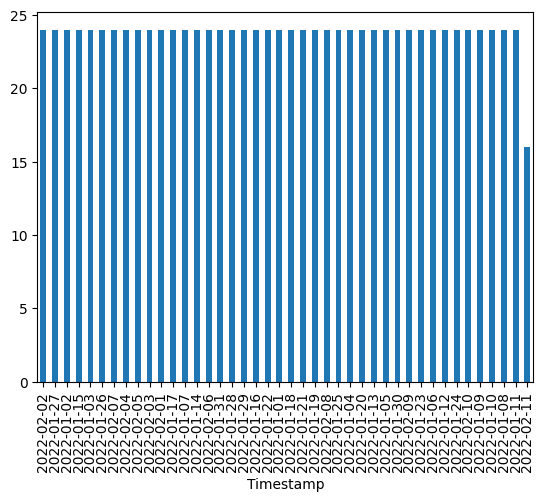

<Axes: xlabel='Timestamp'>

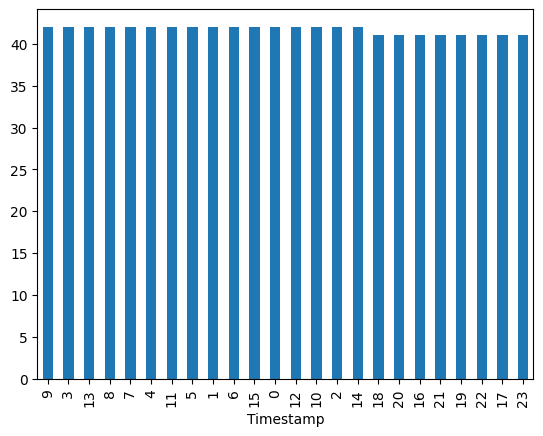

In [12]:
#distrubution of timestamps
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Timestamp'].dt.date.value_counts().plot(kind='bar')
plt.show()

#frrequency of timestamps
data['Timestamp'].dt.hour.value_counts().plot(kind='bar')


Mean: 55.39487147053157
Median: 57.8443249636598
Mode: 0      10.006933
1      10.047488
2      10.588863
3      10.642141
4      10.661651
         ...    
995    99.719234
996    99.775358
997    99.832634
998    99.879302
999    99.887410
Name: Amount, Length: 1000, dtype: float64
Standard Deviation: 25.070809078117673
Range: 89.88047718085228


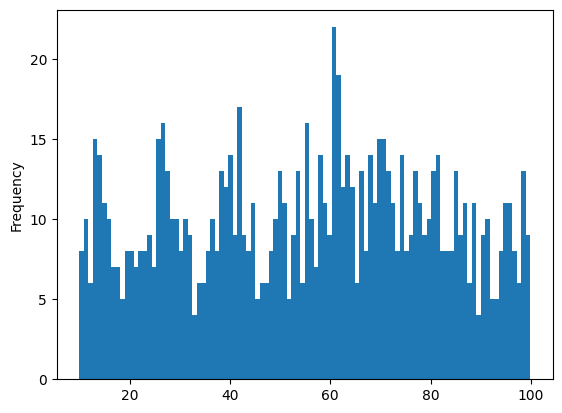

In [13]:
# mean, median, mode, std, range, and distribution of transaction amount
mean = data['Amount'].mean()
median = data['Amount'].median()
mode = data['Amount'].mode()
std = data['Amount'].std()
range = data['Amount'].max() - data['Amount'].min()

print('Mean:', mean)
print('Median:', median)
print('Mode:', mode)
print('Standard Deviation:', std)
print('Range:', range)

data['Amount'].plot(kind='hist', bins=100)
plt.show()

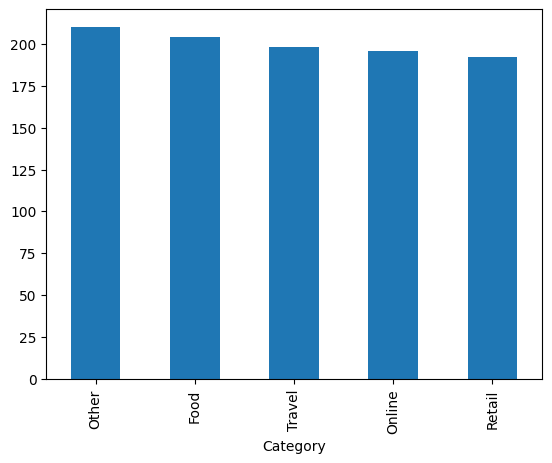

In [14]:
#frequency distrutbtion of transaction category
data['Category'].value_counts().plot(kind='bar')
plt.show()

In [15]:
#propotion of fraudulant transactions
fraud = data[data['FraudIndicator'] == 1]
non_fraud = data[data['FraudIndicator'] == 0]

fraud_prop = len(fraud) / len(data)
non_fraud_prop = len(non_fraud) / len(data)

print('Fraudulant Transactions:', fraud_prop)
print('Non-Fraudulant Transactions:', non_fraud_prop)

Fraudulant Transactions: 0.045
Non-Fraudulant Transactions: 0.955


<Axes: ylabel='Frequency'>

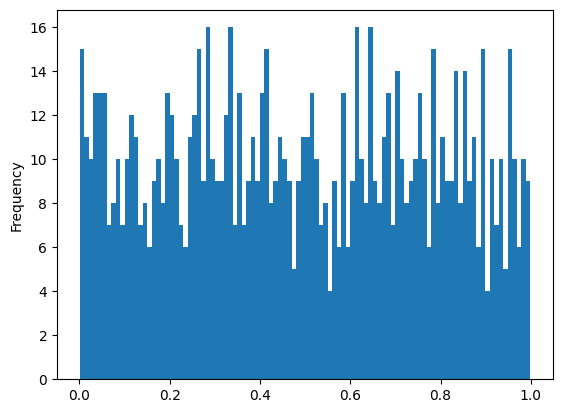

In [16]:
# distribution of anomaly scores
data['AnomalyScore'].plot(kind='hist', bins=100)


## Modeling

Accuracy: 0.945
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5


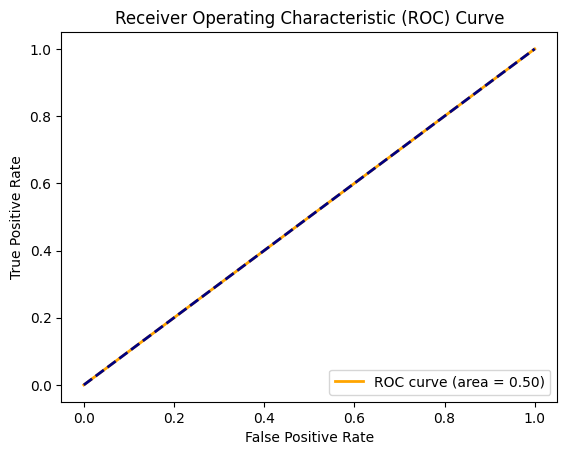

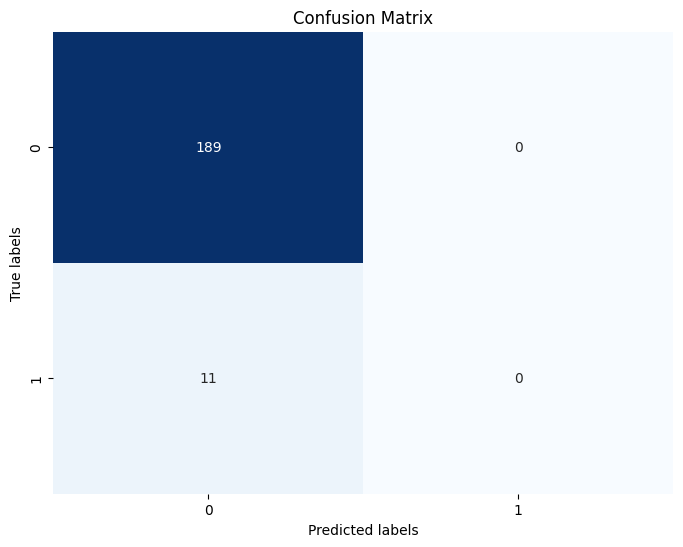

In [38]:
#split, train, test data
X = data.drop(['FraudIndicator','Category', 'Name', 'Address', 'CustomerID', 'MerchantID', 'LastLogin','Timestamp'],axis=1)
Y = data['FraudIndicator']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# create pipeline with SMOTE oversampling and RandomUnderSampler undersampling
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42))
])

# Resample the data
X_resampled, Y_resampled = pipeline.fit_resample(X_train, Y_train)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

precision = precision_score(Y_test, Y_pred)
print("Precision:", precision)

recall = recall_score(Y_test, Y_pred)
print("Recall:", recall)

f1 = f1_score(Y_test, Y_pred)
print("F1 Score:", f1)

roc_auc = roc_auc_score(Y_test, Y_pred)
print("ROC AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.805
Precision: 0.03333333333333333
Recall: 0.09090909090909091
F1 Score: 0.04878048780487805
ROC AUC Score: 0.46873496873496867


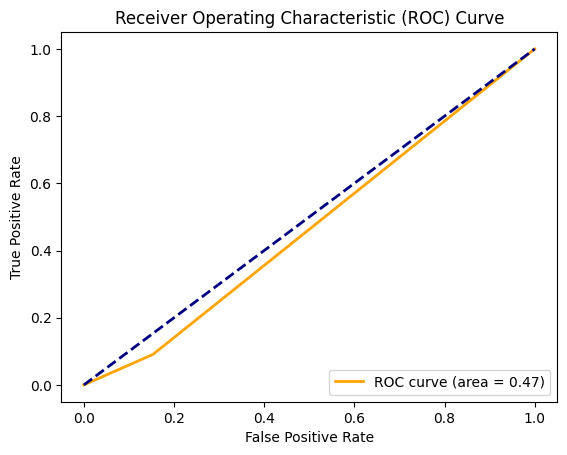

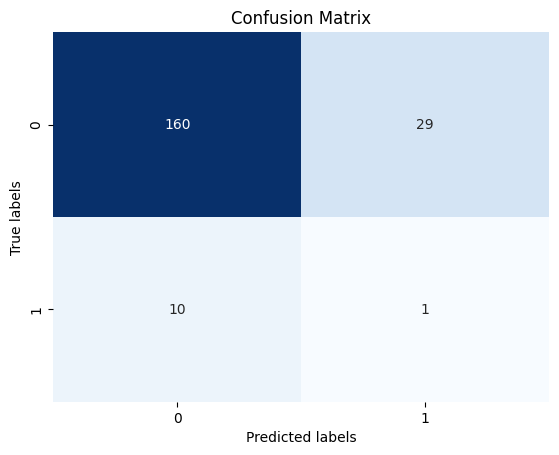

In [40]:
# create pipeline with SMOTE oversampling and RandomUnderSampler undersampling
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42))
])

# Resample the training data
X_train_resampled, Y_train_resampled = pipeline.fit_resample(X_train, Y_train)

# Train Decision Tree Classifier model
model = DecisionTreeClassifier()
model.fit(X_train_resampled, Y_train_resampled)

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.855
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.4523809523809524


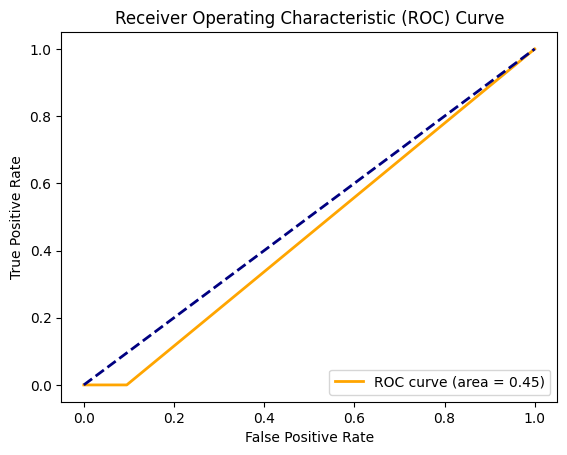

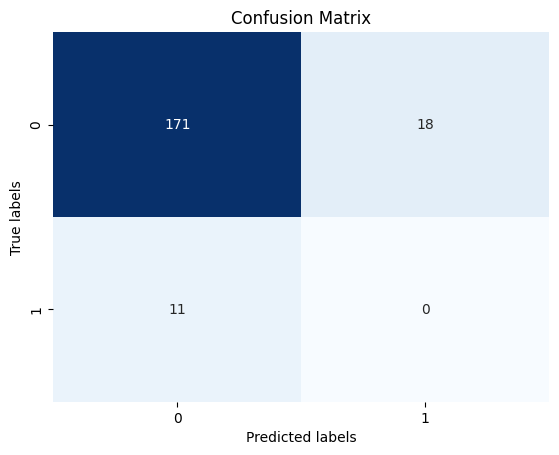

In [42]:
from sklearn.ensemble import RandomForestClassifier

# create pipeline with SMOTE oversampling and RandomUnderSampler undersampling
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42))
])

X_train_resampled, Y_train_resampled = pipeline.fit_resample(X_train, Y_train)

# Train Random Forest Classifier model
model = RandomForestClassifier()
model.fit(X_train_resampled, Y_train_resampled)

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

